In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

In [5]:
data = pd.read_csv('AirPassengers.csv',parse_dates=['Month'])

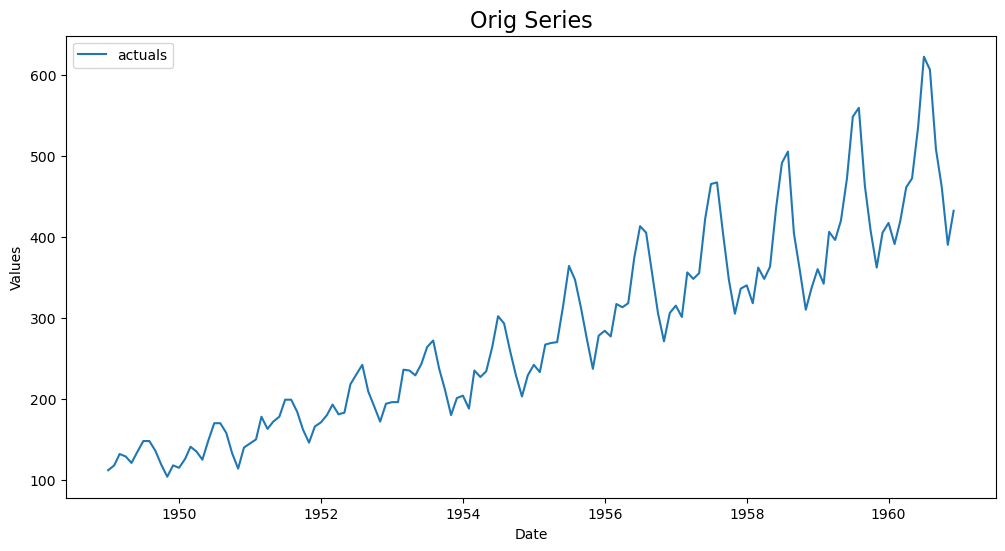

In [6]:
f = Forecaster(y=data['#Passengers'],current_dates=data['Month'])
f.plot()
plt.title('Orig Series',size=16)
plt.show()

In [7]:
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

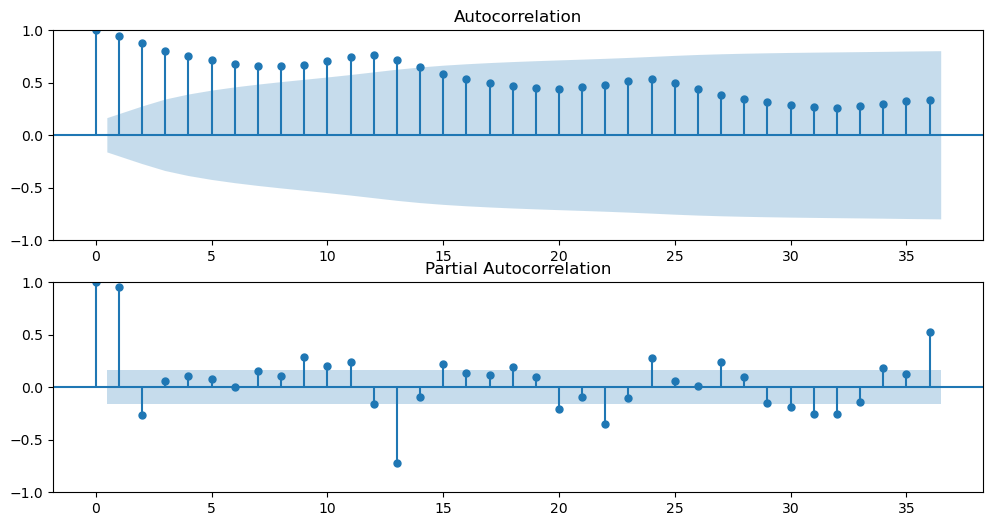

In [8]:
figs, axs = plt.subplots(2, 1,figsize=(12,6))
f.plot_acf(ax=axs[0],lags=36)
f.plot_pacf(ax=axs[1],lags=36)
plt.show()

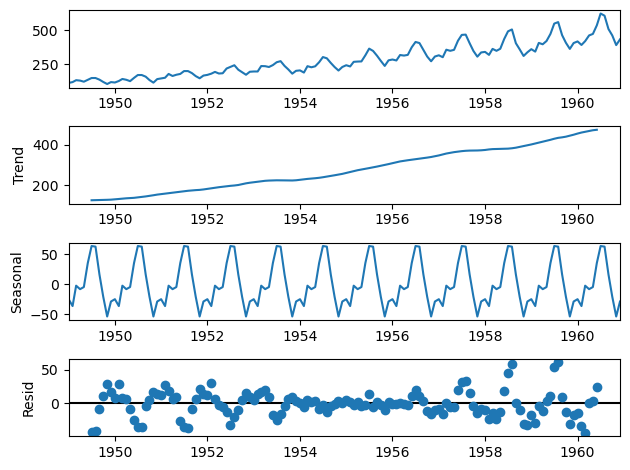

In [9]:
f.seasonal_decompose().plot()
plt.show()

In [10]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: 0.82
the p-value is 0.9919
the series is not stationary
----------------------------------------------------------------------------------------------------


In [13]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network

4/4 [==============================] - 0s 2ms/step


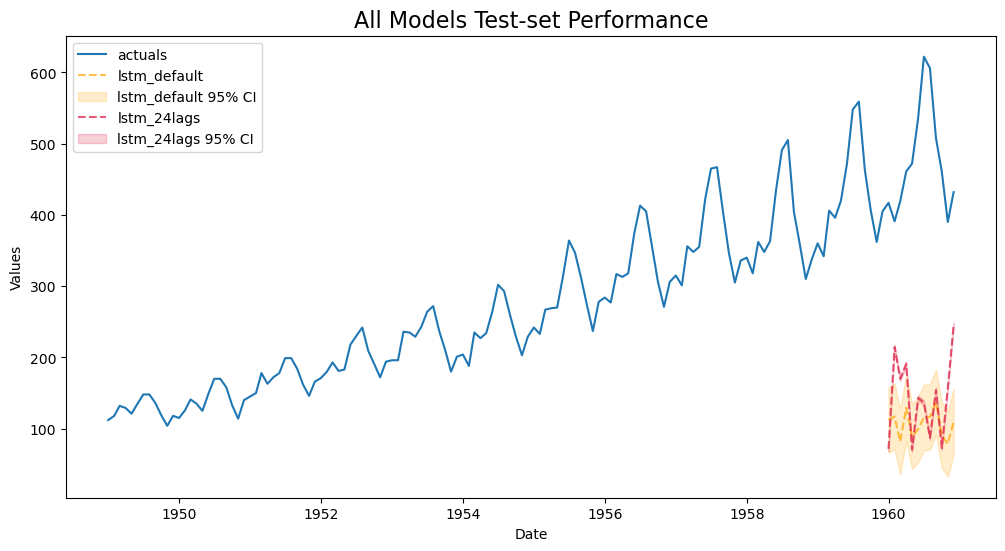

In [18]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)
plt.title('All Models Test-set Performance',size=16)
plt.show()

Epoch 1/5
3/3 [==============================] - 1s 190ms/step - loss: 0.4198 - val_loss: 0.1732
Epoch 2/5
3/3 [==============================] - 0s 33ms/step - loss: 0.4072 - val_loss: 0.1647
Epoch 3/5
3/3 [==============================] - 0s 23ms/step - loss: 0.3945 - val_loss: 0.1559
Epoch 4/5
3/3 [==============================] - 0s 32ms/step - loss: 0.3814 - val_loss: 0.1468
Epoch 5/5
1/1 [==============================] - 0s 281ms/step
Epoch 1/5
3/3 [==============================] - 1s 144ms/step - loss: 0.4332 - val_loss: 0.1656
Epoch 2/5
3/3 [==============================] - 0s 37ms/step - loss: 0.4214 - val_loss: 0.1571
Epoch 3/5
3/3 [==============================] - 0s 28ms/step - loss: 0.4094 - val_loss: 0.1484
Epoch 4/5
3/3 [==============================] - 0s 25ms/step - loss: 0.3969 - val_loss: 0.1392
Epoch 5/5
4/4 [==============================] - 0s 1ms/step


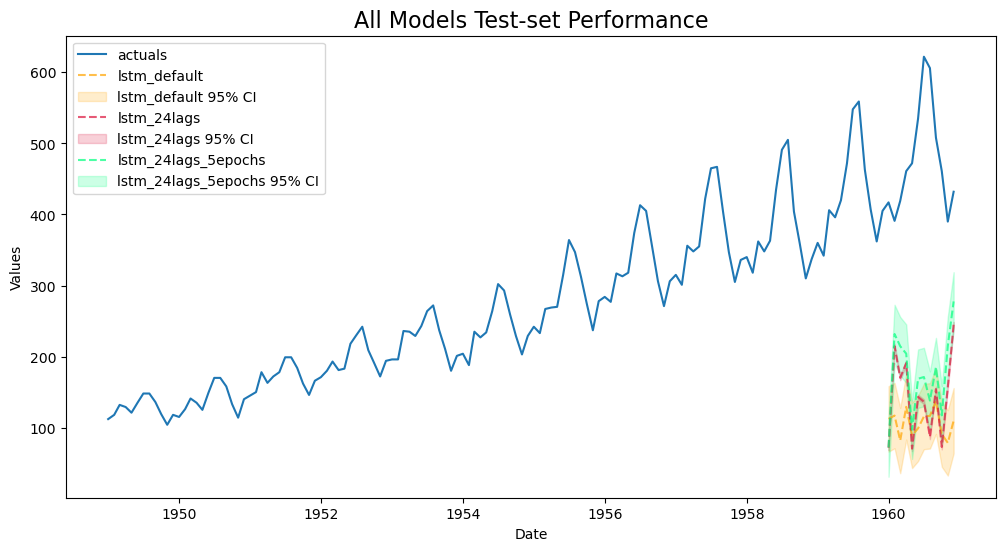

In [20]:
f.manual_forecast(call_me='lstm_24lags_5epochs',lags=24,epochs=5,validation_split=.2,shuffle=True)
f.plot_test_set(ci=True)
plt.title('All Models Test-set Performance',size=16)
plt.show()

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(
                      monitor='val_loss',
                      patience=5
                  ),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))

Epoch 1/25
3/3 [==============================] - 3s 383ms/step - loss: 0.4572 - val_loss: 0.1824
Epoch 2/25
3/3 [==============================] - 0s 66ms/step - loss: 0.4338 - val_loss: 0.1663
Epoch 3/25
3/3 [==============================] - 0s 78ms/step - loss: 0.4073 - val_loss: 0.1477
Epoch 4/25
3/3 [==============================] - 0s 53ms/step - loss: 0.3764 - val_loss: 0.1313
Epoch 5/25
3/3 [==============================] - 0s 47ms/step - loss: 0.3386 - val_loss: 0.1261
Epoch 6/25
3/3 [==============================] - 0s 46ms/step - loss: 0.3040 - val_loss: 0.1293
Epoch 7/25
3/3 [==============================] - 0s 42ms/step - loss: 0.2824 - val_loss: 0.1369
Epoch 8/25
3/3 [==============================] - 0s 49ms/step - loss: 0.2625 - val_loss: 0.1424
Epoch 9/25
3/3 [==============================] - 0s 48ms/step - loss: 0.2405 - val_loss: 0.1355
Epoch 10/25
3/3 [==============================] - 0s 52ms/step - loss: 0.2163 - val_loss: 0.1188
Epoch 11/25
3/3 [===========

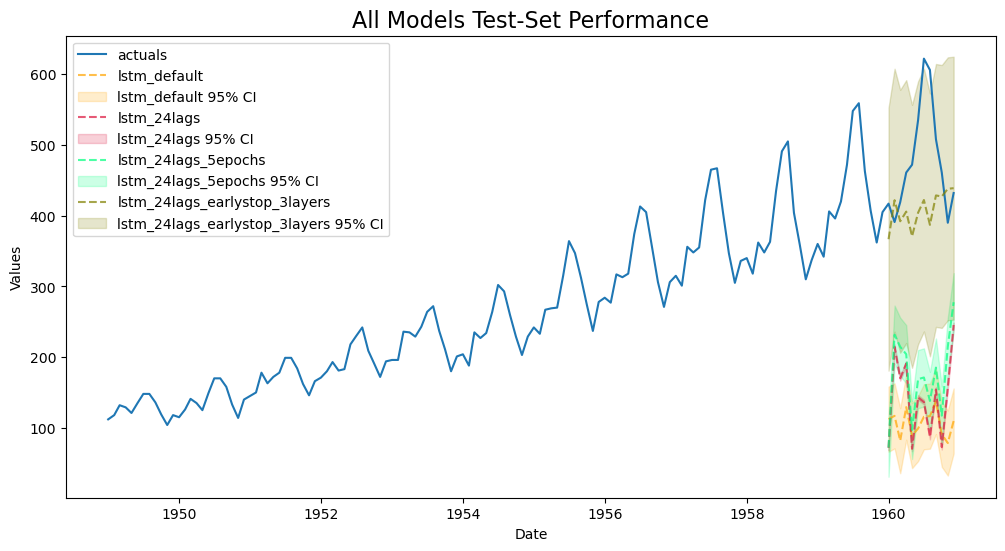

In [22]:
f.plot_test_set(ci=True)
plt.title('All Models Test-Set Performance',size=16)
plt.show()

Epoch 1/15
3/3 [==============================] - 4s 480ms/step - loss: 0.4775 - val_loss: 0.1910
Epoch 2/15
3/3 [==============================] - 0s 96ms/step - loss: 0.3512 - val_loss: 0.1372
Epoch 3/15
3/3 [==============================] - 0s 102ms/step - loss: 0.2415 - val_loss: 0.1140
Epoch 4/15
3/3 [==============================] - 0s 110ms/step - loss: 0.1447 - val_loss: 0.0593
Epoch 5/15
3/3 [==============================] - 0s 93ms/step - loss: 0.1215 - val_loss: 0.0814
Epoch 6/15
3/3 [==============================] - 0s 90ms/step - loss: 0.1210 - val_loss: 0.0758
Epoch 7/15
3/3 [==============================] - 0s 112ms/step - loss: 0.1052 - val_loss: 0.0540
Epoch 8/15
3/3 [==============================] - 0s 108ms/step - loss: 0.0985 - val_loss: 0.0525
Epoch 9/15
3/3 [==============================] - 0s 115ms/step - loss: 0.0901 - val_loss: 0.0514
Epoch 10/15
3/3 [==============================] - 0s 103ms/step - loss: 0.0893 - val_loss: 0.0567
Epoch 11/15
3/3 [=====

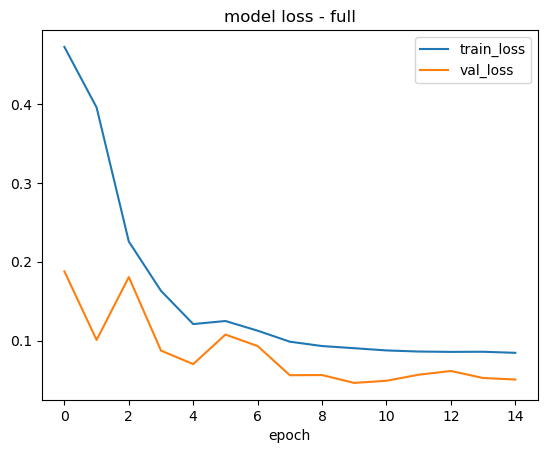

3/3 [==============================] - 0s 45ms/step


In [23]:
f.manual_forecast(call_me='lstm_24lags_4layers_15epochs',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(
                      monitor='val_loss',
                      patience=5
                  ),
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)


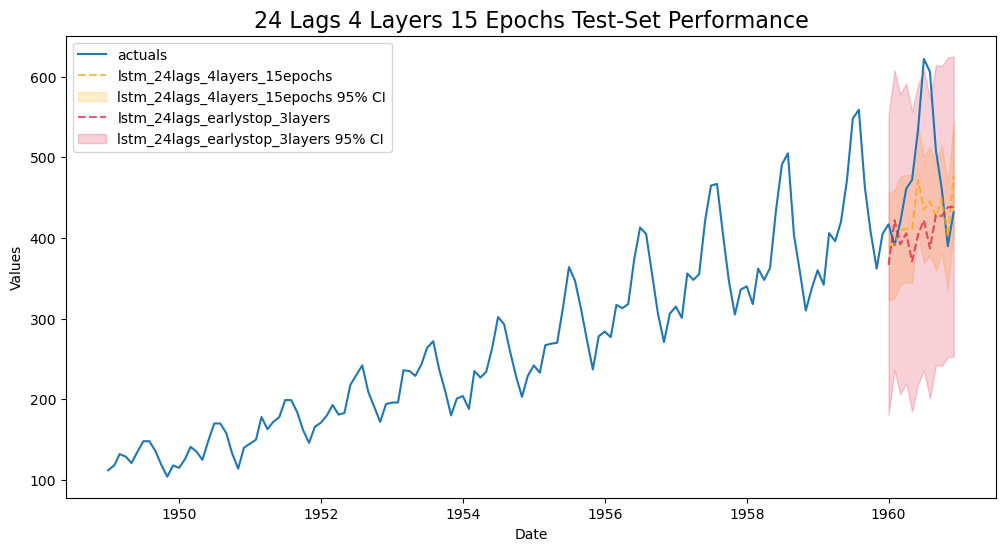

In [24]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
plt.title('24 Lags 4 Layers 15 Epochs Test-Set Performance',size=16)
plt.show()

Epoch 1/300
5/5 [==============================] - 19s 1s/step - loss: 0.4570 - val_loss: 0.3126
Epoch 2/300
5/5 [==============================] - 3s 633ms/step - loss: 0.1854 - val_loss: 0.1629
Epoch 3/300
5/5 [==============================] - 4s 793ms/step - loss: 0.1733 - val_loss: 0.2040
Epoch 4/300
5/5 [==============================] - 3s 498ms/step - loss: 0.1448 - val_loss: 0.1360
Epoch 5/300
5/5 [==============================] - 4s 524ms/step - loss: 0.1809 - val_loss: 0.1978
Epoch 6/300
5/5 [==============================] - 3s 537ms/step - loss: 0.1554 - val_loss: 0.2535
Epoch 7/300
5/5 [==============================] - 3s 549ms/step - loss: 0.1373 - val_loss: 0.1766
Epoch 8/300
5/5 [==============================] - 4s 717ms/step - loss: 0.1260 - val_loss: 0.0811
Epoch 9/300
5/5 [==============================] - 3s 532ms/step - loss: 0.1036 - val_loss: 0.0663
Epoch 10/300
5/5 [==============================] - 4s 686ms/step - loss: 0.1030 - val_loss: 0.0759
Epoch 11/30

5/5 [==============================] - 4s 735ms/step - loss: 0.0926 - val_loss: 0.0792
Epoch 84/300
5/5 [==============================] - 3s 670ms/step - loss: 0.0933 - val_loss: 0.0608
Epoch 85/300
5/5 [==============================] - 4s 710ms/step - loss: 0.0944 - val_loss: 0.0752
Epoch 86/300
5/5 [==============================] - 3s 630ms/step - loss: 0.0918 - val_loss: 0.0626
Epoch 87/300
5/5 [==============================] - 5s 832ms/step - loss: 0.0900 - val_loss: 0.0531
Epoch 88/300
5/5 [==============================] - 4s 842ms/step - loss: 0.0885 - val_loss: 0.0554
Epoch 89/300
5/5 [==============================] - 3s 679ms/step - loss: 0.0861 - val_loss: 0.0679
Epoch 90/300
5/5 [==============================] - 4s 818ms/step - loss: 0.0892 - val_loss: 0.0632
Epoch 91/300
5/5 [==============================] - 8s 1s/step - loss: 0.0893 - val_loss: 0.0615
Epoch 92/300
5/5 [==============================] - 3s 662ms/step - loss: 0.0871 - val_loss: 0.0634
Epoch 93/300
5/5

5/5 [==============================] - 4s 712ms/step - loss: 0.0837 - val_loss: 0.0573
Epoch 165/300
5/5 [==============================] - 3s 647ms/step - loss: 0.0829 - val_loss: 0.0535
Epoch 166/300
5/5 [==============================] - 3s 629ms/step - loss: 0.0879 - val_loss: 0.0631
Epoch 167/300
5/5 [==============================] - 3s 721ms/step - loss: 0.0872 - val_loss: 0.0575
Epoch 168/300
5/5 [==============================] - 3s 650ms/step - loss: 0.0846 - val_loss: 0.0590
Epoch 169/300
5/5 [==============================] - 3s 627ms/step - loss: 0.0850 - val_loss: 0.0534
Epoch 170/300
5/5 [==============================] - 4s 457ms/step - loss: 0.0851 - val_loss: 0.0577
Epoch 171/300
5/5 [==============================] - 3s 604ms/step - loss: 0.0824 - val_loss: 0.0562
Epoch 172/300
5/5 [==============================] - 4s 614ms/step - loss: 0.0864 - val_loss: 0.0668
Epoch 173/300
5/5 [==============================] - 4s 746ms/step - loss: 0.0886 - val_loss: 0.0598
Epoc

5/5 [==============================] - 4s 928ms/step - loss: 0.0736 - val_loss: 0.0655
Epoch 246/300
5/5 [==============================] - 2s 504ms/step - loss: 0.0726 - val_loss: 0.0559
Epoch 247/300
5/5 [==============================] - 3s 564ms/step - loss: 0.0689 - val_loss: 0.0556
Epoch 248/300
5/5 [==============================] - 4s 920ms/step - loss: 0.0726 - val_loss: 0.0636
Epoch 249/300
5/5 [==============================] - 5s 1s/step - loss: 0.0674 - val_loss: 0.0612
Epoch 250/300
5/5 [==============================] - 2s 398ms/step - loss: 0.0671 - val_loss: 0.0554
Epoch 251/300
5/5 [==============================] - 3s 560ms/step - loss: 0.0645 - val_loss: 0.0593
Epoch 252/300
5/5 [==============================] - 4s 868ms/step - loss: 0.0682 - val_loss: 0.0605
Epoch 253/300
5/5 [==============================] - 4s 860ms/step - loss: 0.0617 - val_loss: 0.0531
Epoch 254/300
5/5 [==============================] - 6s 1s/step - loss: 0.0662 - val_loss: 0.0571
Epoch 255/

5/5 [==============================] - 2s 492ms/step - loss: 0.0844 - val_loss: 0.0507
Epoch 27/300
5/5 [==============================] - 4s 787ms/step - loss: 0.0851 - val_loss: 0.0497
Epoch 28/300
5/5 [==============================] - 3s 554ms/step - loss: 0.0853 - val_loss: 0.0564
Epoch 29/300
5/5 [==============================] - 5s 1s/step - loss: 0.0834 - val_loss: 0.0508
Epoch 30/300
5/5 [==============================] - 4s 722ms/step - loss: 0.0831 - val_loss: 0.0587
Epoch 31/300
5/5 [==============================] - 4s 882ms/step - loss: 0.0831 - val_loss: 0.0489
Epoch 32/300
5/5 [==============================] - 3s 626ms/step - loss: 0.0837 - val_loss: 0.0506
Epoch 33/300
5/5 [==============================] - 3s 648ms/step - loss: 0.0844 - val_loss: 0.0545
Epoch 34/300
5/5 [==============================] - 3s 618ms/step - loss: 0.0866 - val_loss: 0.0555
Epoch 35/300
5/5 [==============================] - 4s 695ms/step - loss: 0.0862 - val_loss: 0.0578
Epoch 36/300
5/5

5/5 [==============================] - 3s 627ms/step - loss: 0.0833 - val_loss: 0.0575
Epoch 109/300
5/5 [==============================] - 3s 573ms/step - loss: 0.0857 - val_loss: 0.0468
Epoch 110/300
5/5 [==============================] - 4s 613ms/step - loss: 0.0859 - val_loss: 0.0481
Epoch 111/300
5/5 [==============================] - 3s 574ms/step - loss: 0.0826 - val_loss: 0.0592
Epoch 112/300
5/5 [==============================] - 4s 982ms/step - loss: 0.0855 - val_loss: 0.0488
Epoch 113/300
5/5 [==============================] - 4s 757ms/step - loss: 0.0836 - val_loss: 0.0514
Epoch 114/300
5/5 [==============================] - 4s 617ms/step - loss: 0.0840 - val_loss: 0.0474
Epoch 115/300
5/5 [==============================] - 3s 613ms/step - loss: 0.0836 - val_loss: 0.0477
Epoch 116/300
5/5 [==============================] - 3s 687ms/step - loss: 0.0841 - val_loss: 0.0504
Epoch 117/300
5/5 [==============================] - 3s 719ms/step - loss: 0.0830 - val_loss: 0.0516
Epoc

5/5 [==============================] - 2s 440ms/step - loss: 0.0670 - val_loss: 0.0534
Epoch 190/300
5/5 [==============================] - 4s 715ms/step - loss: 0.0694 - val_loss: 0.0512
Epoch 191/300
5/5 [==============================] - 3s 533ms/step - loss: 0.0619 - val_loss: 0.0481
Epoch 192/300
5/5 [==============================] - 3s 742ms/step - loss: 0.0631 - val_loss: 0.0457
Epoch 193/300
5/5 [==============================] - 2s 478ms/step - loss: 0.0712 - val_loss: 0.0559
Epoch 194/300
5/5 [==============================] - 2s 532ms/step - loss: 0.0780 - val_loss: 0.0736
Epoch 195/300
5/5 [==============================] - 3s 590ms/step - loss: 0.0737 - val_loss: 0.0557
Epoch 196/300
5/5 [==============================] - 2s 481ms/step - loss: 0.0715 - val_loss: 0.0514
Epoch 197/300
5/5 [==============================] - 2s 456ms/step - loss: 0.0679 - val_loss: 0.0537
Epoch 198/300
5/5 [==============================] - 3s 615ms/step - loss: 0.0602 - val_loss: 0.0463
Epoc

5/5 [==============================] - 4s 642ms/step - loss: 0.0294 - val_loss: 0.0380
Epoch 271/300
5/5 [==============================] - 2s 421ms/step - loss: 0.0289 - val_loss: 0.0356
Epoch 272/300
5/5 [==============================] - 4s 634ms/step - loss: 0.0302 - val_loss: 0.0350
Epoch 273/300
5/5 [==============================] - 3s 737ms/step - loss: 0.0312 - val_loss: 0.0392
Epoch 274/300
5/5 [==============================] - 5s 847ms/step - loss: 0.0336 - val_loss: 0.0639
Epoch 275/300
5/5 [==============================] - 3s 676ms/step - loss: 0.0362 - val_loss: 0.0363
Epoch 276/300
5/5 [==============================] - 4s 972ms/step - loss: 0.0346 - val_loss: 0.0412
Epoch 277/300
5/5 [==============================] - 3s 606ms/step - loss: 0.0335 - val_loss: 0.0367
Epoch 278/300
5/5 [==============================] - 3s 542ms/step - loss: 0.0325 - val_loss: 0.0348
Epoch 279/300
5/5 [==============================] - 3s 572ms/step - loss: 0.0336 - val_loss: 0.0357
Epoc

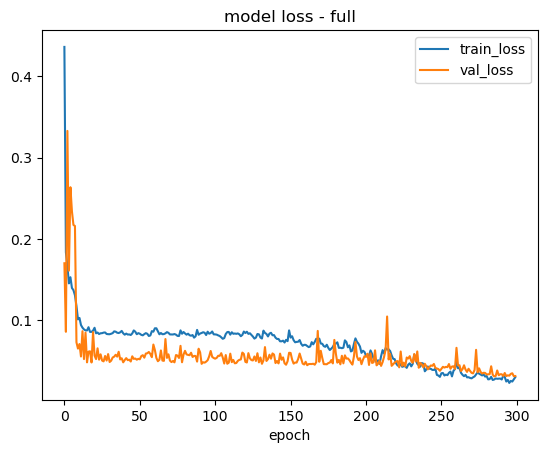

3/3 [==============================] - 0s 137ms/step


In [25]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=16,
                  epochs=300,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(
                      monitor='val_loss',
                      patience=5
                  ),
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

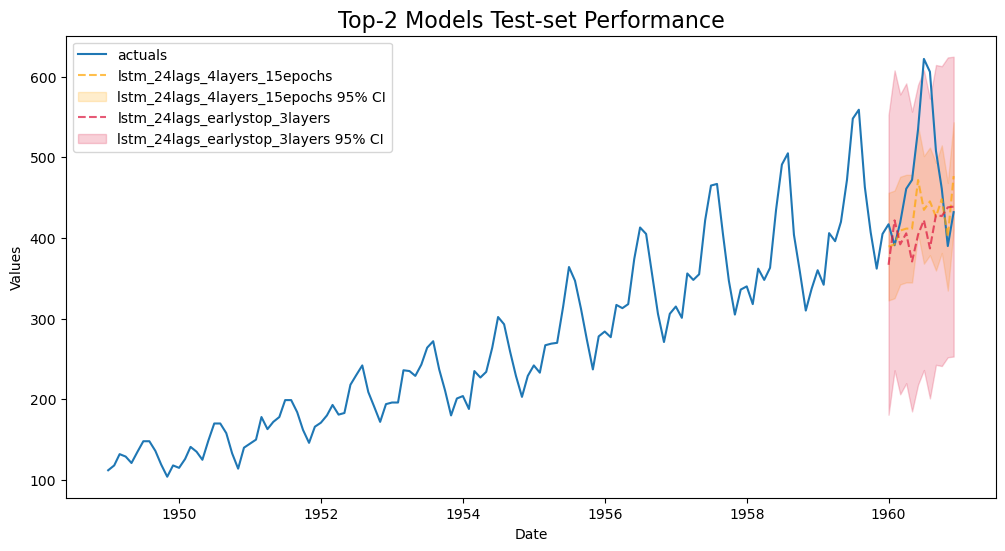

In [26]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
plt.title('Top-2 Models Test-set Performance',size=16)
plt.show()

In [27]:
f.add_ar_terms(24)
f.add_seasonal_regressors('month','quarter',dummy=True)
f.add_seasonal_regressors('year')
f.add_time_trend()
f.diff()

In [28]:
f.set_estimator('mlr')
f.manual_forecast()

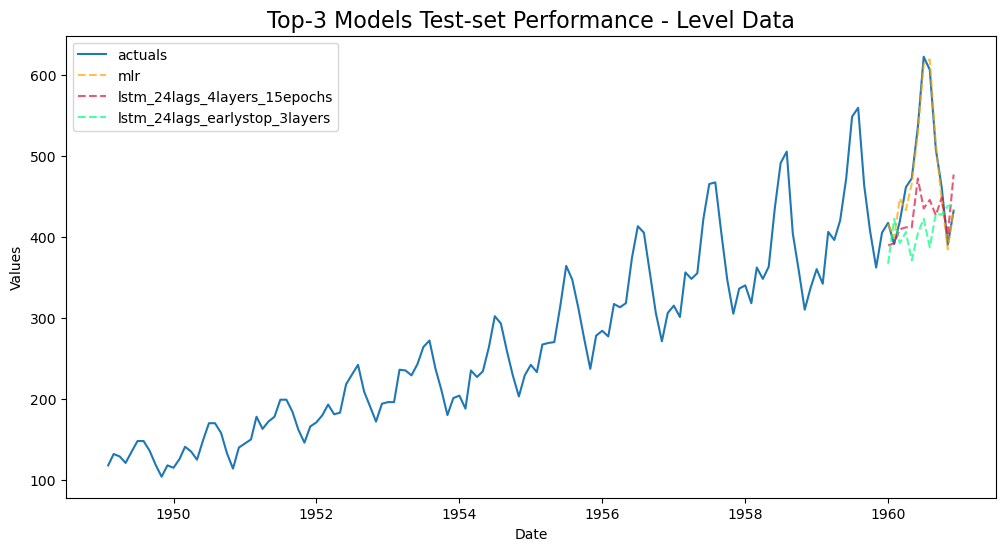

In [29]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_3')
plt.title('Top-3 Models Test-set Performance - Level Data',size=16)
plt.show()

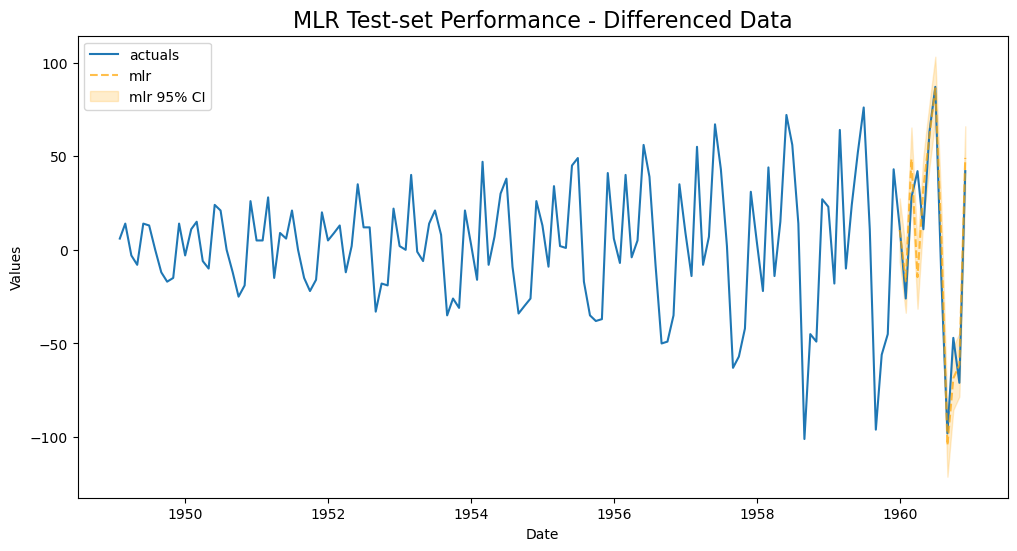

In [30]:
f.plot_test_set(models='mlr',ci=True)
plt.title('MLR Test-set Performance - Differenced Data',size=16)
plt.show()

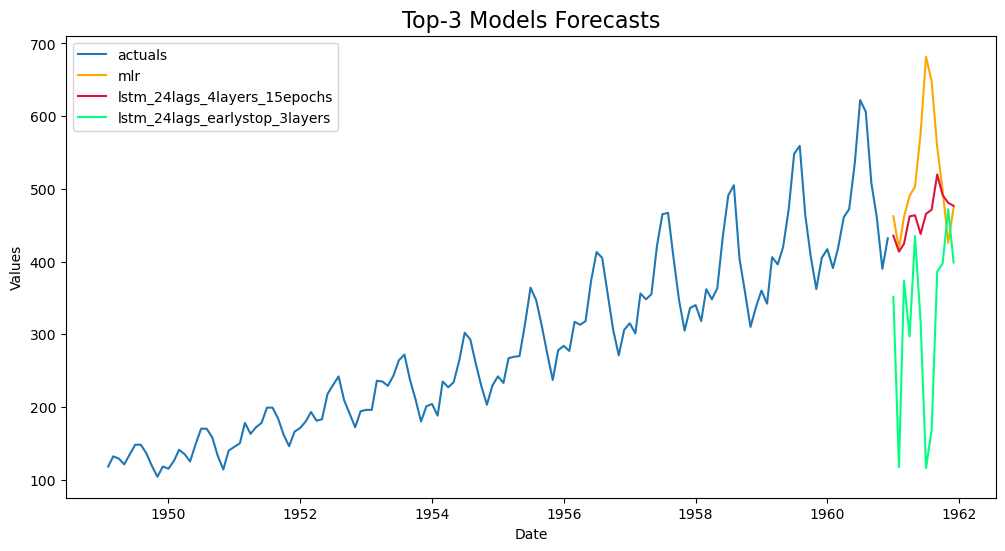

In [31]:
f.plot(order_by='LevelTestSetMAPE',models='top_3')
plt.title('Top-3 Models Forecasts',size=16)
plt.show()

In [32]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname','LevelTestSetMAPE','LevelTestSetRMSE','LevelTestSetR2','best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,mlr,0.023420,13.932124,0.964960,True
1,lstm_24lags_4layers_15epochs,0.111109,82.024604,-0.214563,False
2,lstm_24lags_earlystop_3layers,0.157855,105.021283,-0.991069,False
3,lstm_best,0.164115,102.505755,-0.896829,False
4,lstm_24lags_5epochs,0.620216,319.606958,-17.440134,False
5,lstm_24lags,0.687265,350.007626,-21.114984,False
6,lstm_default,0.773448,376.356460,-24.569978,False


In [33]:
f.export_forecasts_with_cis('mlr')

AttributeError: 'Forecaster' object has no attribute 'export_forecasts_with_cis'

In [34]:

f.export_forecasts_with_cis('lstm_best')

AttributeError: 'Forecaster' object has no attribute 'export_forecasts_with_cis'

In [35]:
f.save_feature_importance()
f.export_feature_importance('mlr')

,weight,std
feature,,
AR1,0.649588,0.056707
AR4,0.315878,0.031751
AR10,0.235682,0.024134
AR11,0.197732,0.023170
AR21,0.193741,0.023539
AR18,0.160591,0.014150
AR2,0.128012,0.030192
AR12,0.125027,0.033513
AR13,0.121506,0.027616
